# Data Wrangling

**Data Cleaning**

There was a fair amount of collection and organization needed for this data. I followed two pathways to process this data.
I began by downloading 9 different .txt files that I then converted to .csv format and uploaded into google drive to remove the
separators, <SEP> within the files, so that these columns could be easily loaded into pandas. It was only after I worked with several
files that I implemented / found the code which would automatically recognize <SEP> as the delimiter in this case (it varies away from
the normal comma found in .csv files). Once I figured out how to parse out the <SEP> delimiters with the sep function, I was able to
load two data files this way without having to go through google docs first, to remove the duplicate separators. After I uploaded the .csv
files into my Jupyter Notebook, I was able to open a new Python file and load these files into pandas.

**Pathway 1**
1. Found and downloaded 9 .txt files from Columbia website.
2. Removed the <SEP> separator in the .txt files using Google Docs.
3. Converted 9 .txt files to .csv files.
4. Uploaded these to Jupyter Notebook.
5. Loaded the csv data into pandas.
6. Labelled all of the columns. (ex: EchoNestArtistID, tag, Artist.)
7. Pushed rows to begin with 1 instead of 0.
8. df.info() to understand a bit more of the data.
    
**Pathway 2**
1. Found and downloaded 3 SQL files with DB Browser for SQL Lite.
2. Exported the relevant data from DB Browser to .csv files.
3. Uploaded all .csv files to Jupyter Notebook.
4. Loaded the csv data into pandas using a sep argument that parsed out <SEP> for me, instead of using Google Docs.
5. Labelled all of the columns. (Duration, Artist Hotttnesss.)
6. Pushed rows to begin with 1 instead of 0.
7. df.info() to understand a bit more of the data.

**Missing Values**

The main missing values I faced with this data were the zeros in place of missing years, and labels for the data columns, or rather, what the data meant. To deal with this, I cross referenced a descriptor file to differentiate between MusicBrainz data and EchoNest data and inserted column names when organizing my data.

**Outliers**

I’ve gotten pretty lucky because so far to my knowledge I have yet to come across any outliers.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
%matplotlib inline
plt.show()

# Loading Artist Tag CSV into Pandas, Changing Index and Showing Head

In [2]:
tagdf = pd.read_csv('8_artisttag.csv', names=['EchoNestArtistID','Tag'])
tagdf.index += 1
tagdf.head()

,EchoNestArtistID,Tag
1,AR002UA1187B9A637D,uk
2,AR002UA1187B9A637D,rock
3,AR002UA1187B9A637D,garage rock
4,AR006821187FB5192B,bass
5,AR00A6H1187FB5402A,detroit


# Changing Data Frame

In [3]:
tagdf['Tag'][:2]

1      uk
2    rock
Name: Tag, dtype: object

# Value Counts

In [4]:
tagdf['Tag'].value_counts()

classic pop and rock          1073
american                      1027
uk                            1013
british                        975
rock and indie                 920
rock                           843
english                        670
punk                           636
folk                           603
electronic                     413
german                         387
pop                            384
usa                            370
hip hop rnb and dance hall     323
dance and electronica          275
metal                          270
french                         245
pop and chart                  240
european                       232
alternative rock               220
production music               216
england                        212
jazz                           203
finnish                        183
progressive rock               166
hip hop                        152
jazz and blues                 149
classical                      146
indie rock          

In [5]:
(plt.figure())

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Plotting top 25 tags

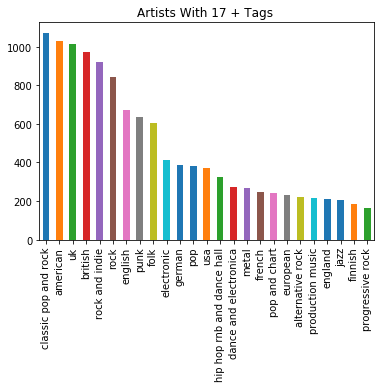

In [6]:
tagdf['Tag'].value_counts()[:25].plot(kind='bar', title='Artists With 17 + Tags ')

# Loading Metadata CSV into Pandas, Labelling Columns and Showing Head

In [7]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv', names=['Track_ID','Title','Song_ID','Release','EchoNestArtistID','Artist_MBID','Artist_Name','Duration','Artist_Familiarity','Artist_Hotttnesss','Year','Track_7digitalid','shs_perf','shs_work'])
df.head()

,Track_ID,Title,Song_ID,Release,EchoNestArtistID,Artist_MBID,Artist_Name,Duration,Artist_Familiarity,Artist_Hotttnesss,Year,Track_7digitalid,shs_perf,shs_work
0,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
1,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822100201,0.394031892714,2003,7032331,-1,0
2,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439603966677,0.356992107756,1995,1514808,-1,0
3,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643680572058,0.437503836595,2006,6945353,-1,0
4,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501159656,0.372349068517,2003,2168257,-1,0


In [8]:
df['Artist_Name'][:3]

0         artist_name
1    Faster Pussy cat
2    Karkkiautomaatti
Name: Artist_Name, dtype: object

# Which artists have been in the Billboard Hot 100 The Most?

In [9]:
df['Artist_Name'].value_counts()

Michael Jackson                                           194
Johnny Cash                                               193
Beastie Boys                                              187
Joan Baez                                                 181
Neil Diamond                                              176
Duran Duran                                               175
Aerosmith                                                 173
Franz Ferdinand                                           173
Radiohead                                                 173
The Doors                                                 171
The Rolling Stones                                        171
Jimi Hendrix                                              170
The Cure                                                  169
Faron Young                                               168
Ella Fitzgerald                                           168
Elvis Presley                                             167
Kenny Ro

In [10]:
(plt.figure())

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

# Plotting Top 20 Artists By Value Count / Frequency

Text(0.5, 1.0, 'Top 20 Billboard Hot 100 Artist Frequency')

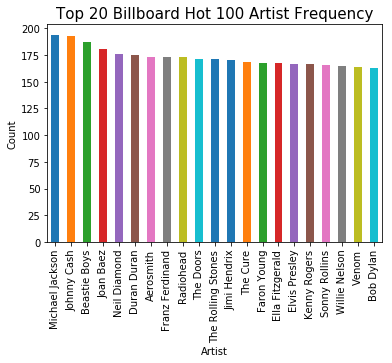

In [11]:
df['Artist_Name'].value_counts()[0:21].plot(kind='bar', fontsize=10)
plt.xlabel("Artist", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.title('Top 20 Billboard Hot 100 Artist Frequency',fontsize= 15)

# Cleaning up dataframe to filter out rows where year = 0

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from decimal import Decimal
%matplotlib inline
plt.show()

In [13]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv')
df.index += 1
df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
1,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
2,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
3,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
4,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
5,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,NaN,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


# Create DataFrame that consists of only duration and year

In [14]:
df = df[['duration', 'year']]
df.head()

,duration,year
1,252.05506,2003
2,156.55138,1995
3,138.97098,2006
4,145.05751,2003
5,514.29832,0


# Remove all values that equal 0 in the year column

In [15]:
df = df[(df[['year']] != 0).all(axis=1)]
df

,duration,year
1,252.05506,2003
2,156.55138,1995
3,138.97098,2006
4,145.05751,2003
8,221.20444,1993
11,68.96281,2007
12,168.22812,1997
14,318.45832,2005
16,262.26893,1998
17,216.47628,1994


# Explore what types of data are in this DataFrame...

In [20]:
df.dtypes

duration    float64
year          int64
dtype: object

# <font color='red'> Is there a correlation between duration of the track and the year?</font>

# 2 methods for getting mean song duration for each year 

# 1 : Get mean song duration for each year and create  <font color='red'> dfmean </font> dataset


> * Group the DataFrame by the year column
> * Compute the mean across the duration column for each year group


In [171]:
# setting index_parameter to false prohibits the year header from being added as a value and removed from the header names. 
dfmean = df.groupby(['year'], as_index=False).duration.mean()
dfmean.index += 1
dfmean

,year,duration
1,1922,222.236282
2,1924,186.169016
3,1925,185.584619
4,1926,185.908892
5,1927,183.896728
6,1928,186.527395
7,1929,189.893178
8,1930,189.851628
9,1931,197.758427
10,1932,188.679621


# Plot mean from dfmean dataframe

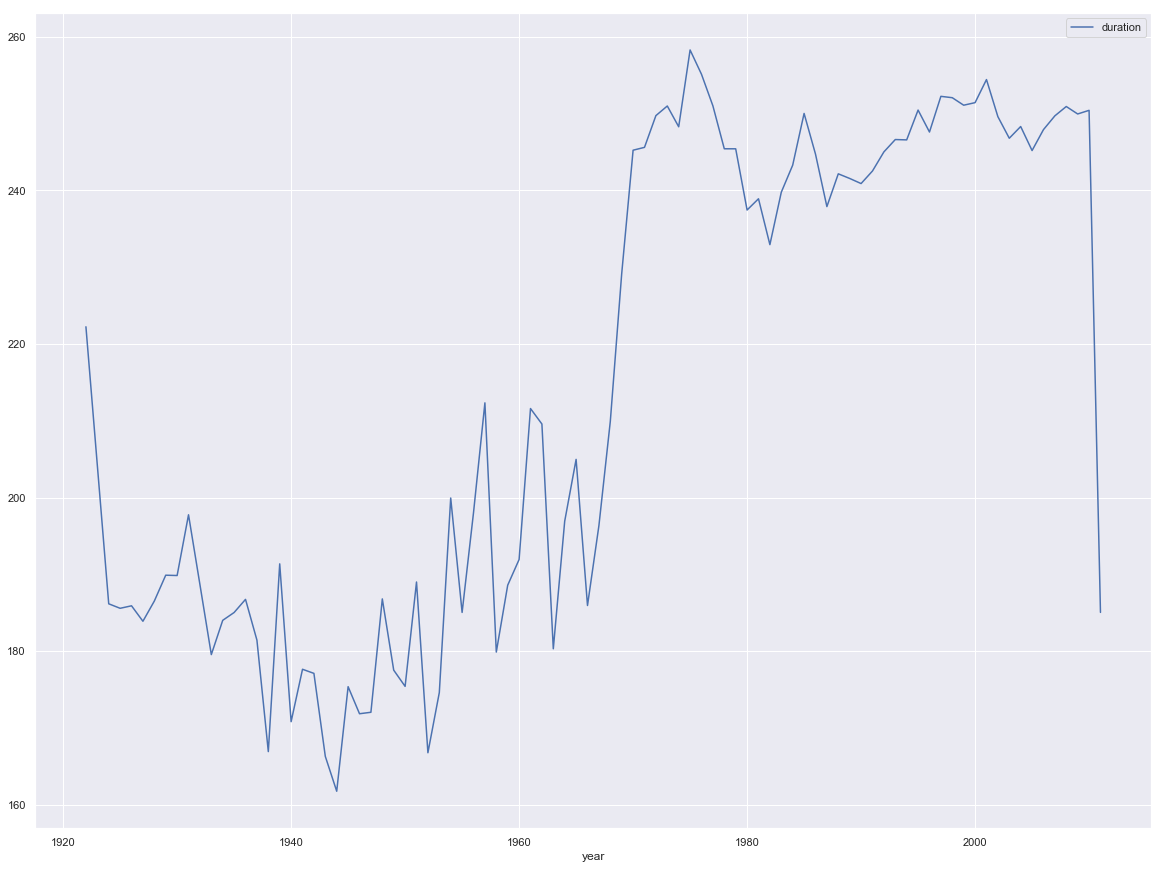

In [175]:
dfmean.plot('year')

# 2 : Get mean song duration for each year and create  <font color='red'> dfmeand </font> dataset

In [177]:
#again, we set the index_parameter to false to prevent the year heading from falling out
def convert_string_float(x):
    try:
        return float(x)
    except:
        return 0.0
    
df = df[['duration', 'year']].copy()
df = df.reindex(columns = ['duration', 'year'])
df['duration'] = df['duration'].apply(lambda x: convert_string_float(x))
dfmeand = df.groupby(['year'], as_index=False).mean()
dfmean.index += 1
dfmeand

,year,duration
0,1922,222.236282
1,1924,186.169016
2,1925,185.584619
3,1926,185.908892
4,1927,183.896728
5,1928,186.527395
6,1929,189.893178
7,1930,189.851628
8,1931,197.758427
9,1932,188.679621


# Plot mean from dfmeand dataframe

> * Our line plots from the dfmean and dfmeand dataframes are identical

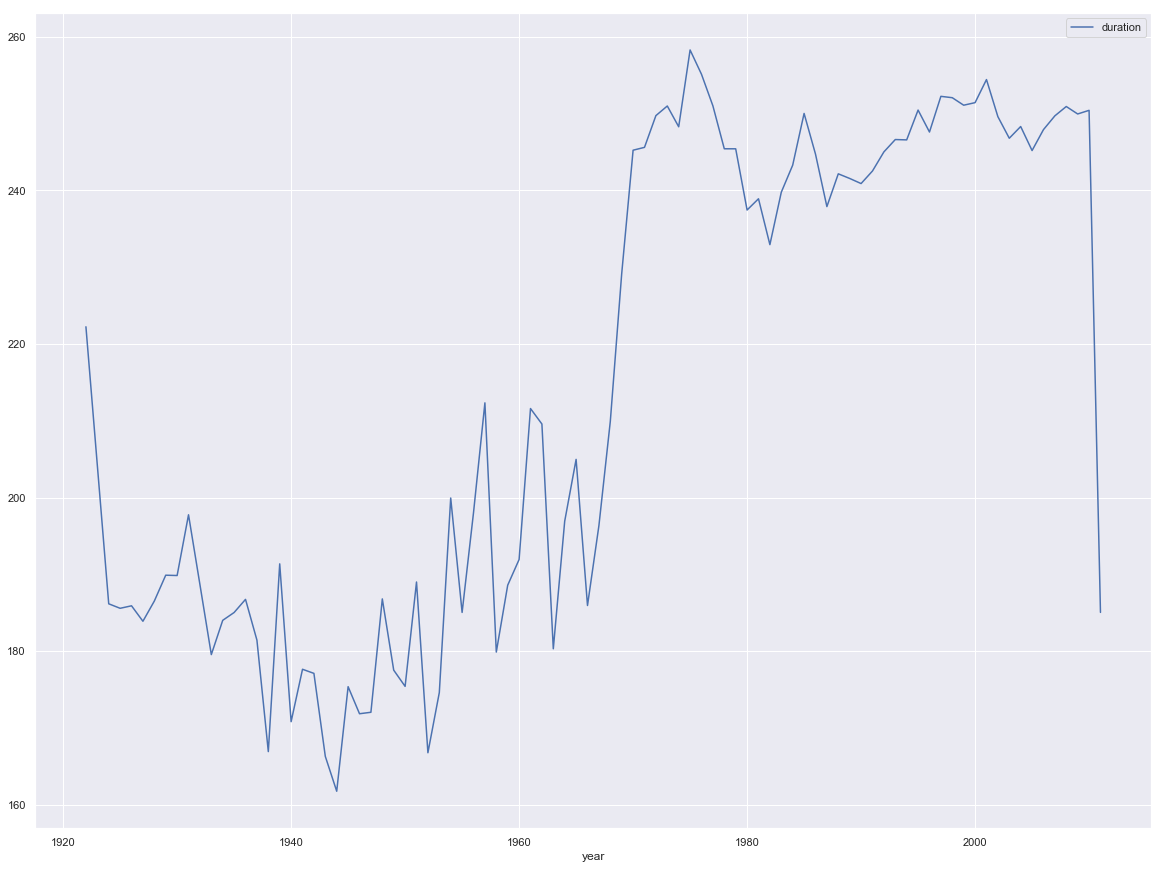

In [179]:
dfmeand.plot('year')

# Seaborn Barplot of Mean Song Duration per Year

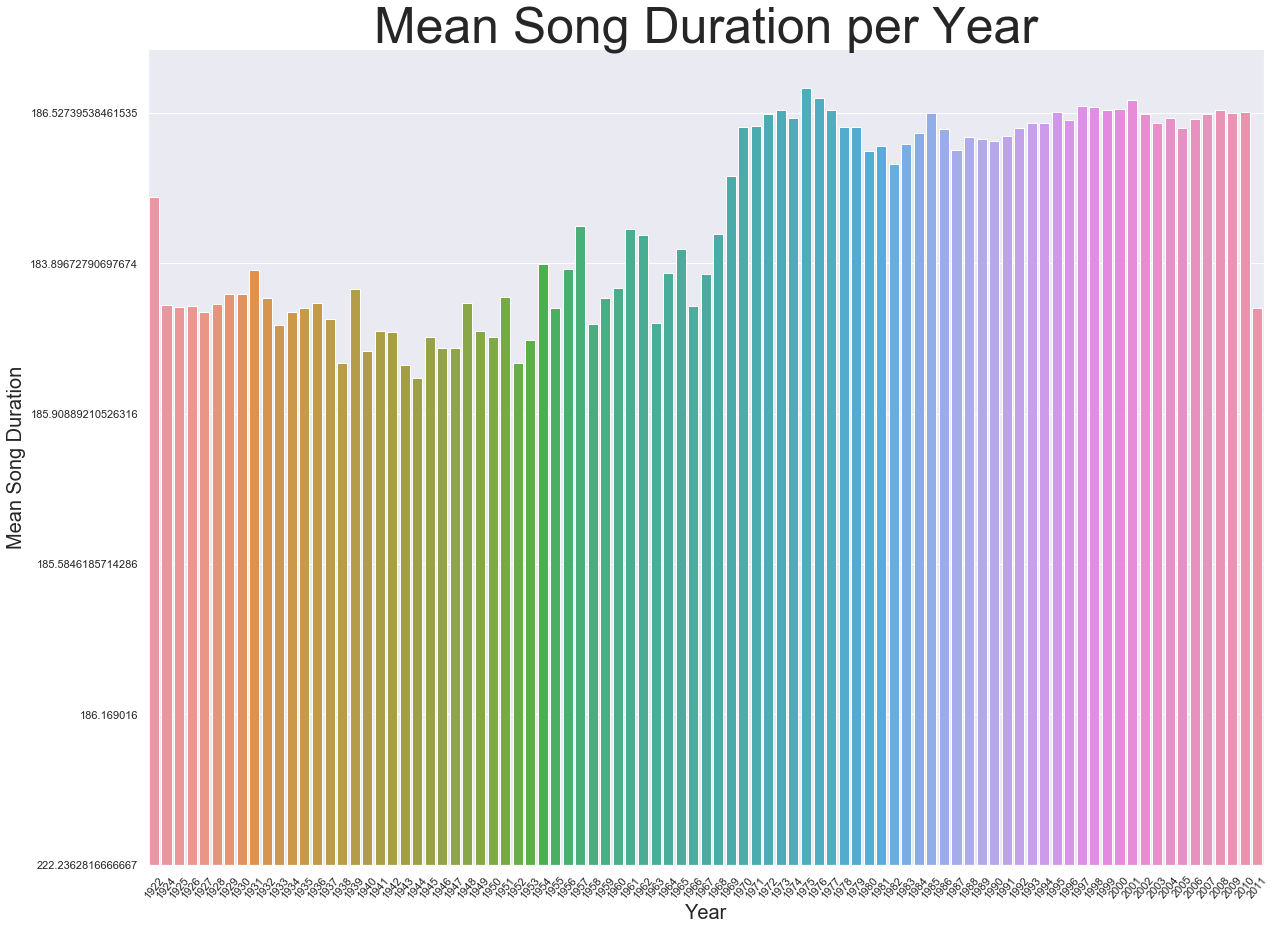

In [180]:
#expand figure size
sns.set(rc={'figure.figsize':(20,15)})
#use seaborn barplot function 
ax = sns.barplot(x=dfmean.year,y=dfmean.duration)
#set xticks
ax.set_xticklabels(labels = dfmean.year, rotation=50)
ax.set_yticklabels(labels = dfmean.duration)
#labels

plt.ylabel("Mean Song Duration", size = 20)
plt.xlabel("Year", size = 20)
plt.title("Mean Song Duration per Year", size = 50) 
plt.show()

# Seaborn Barplot of Song Duration per Year from basic df dataframe

# <font color='red'> WHAT DOES THE SHADING INFER?</font>

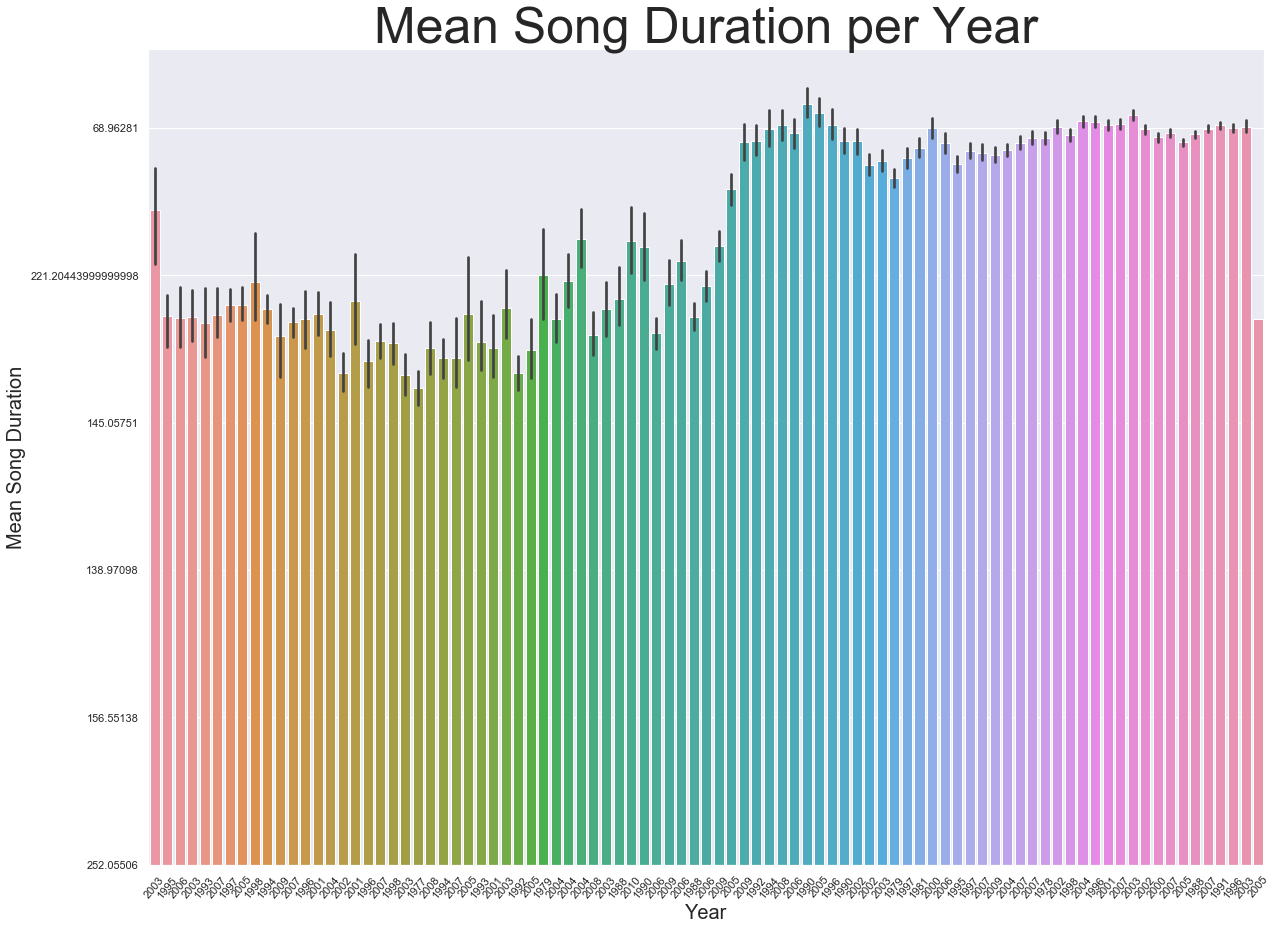

In [115]:
#expand figure size
sns.set(rc={'figure.figsize':(20,15)})
#use seaborn barplot function 
ax = sns.barplot(x=df.year,y=df.duration)
#set xticks
ax.set_xticklabels(labels = df.year, rotation=50)
ax.set_yticklabels(labels = df.duration)
#labels

plt.ylabel("Mean Song Duration", size = 20)
plt.xlabel("Year", size = 20)
plt.title("Mean Song Duration per Year", size = 50) 
plt.show()

In [182]:
dfmean.assign(pro=dfmean.data.map(dfmean.data.value_counts(normalize=True)))

AttributeError: 'AxesSubplot' object has no attribute 'assign'

# Density plot 

>> **We can see from this density plot that songs with a mean run time of around 180 seconds and 240 seconds are most common within the Billboard Top 100 charts (from the years we have in our dataset).**

Text(0.5, 1.0, 'Density Plot of Mean Song Duration per Year')

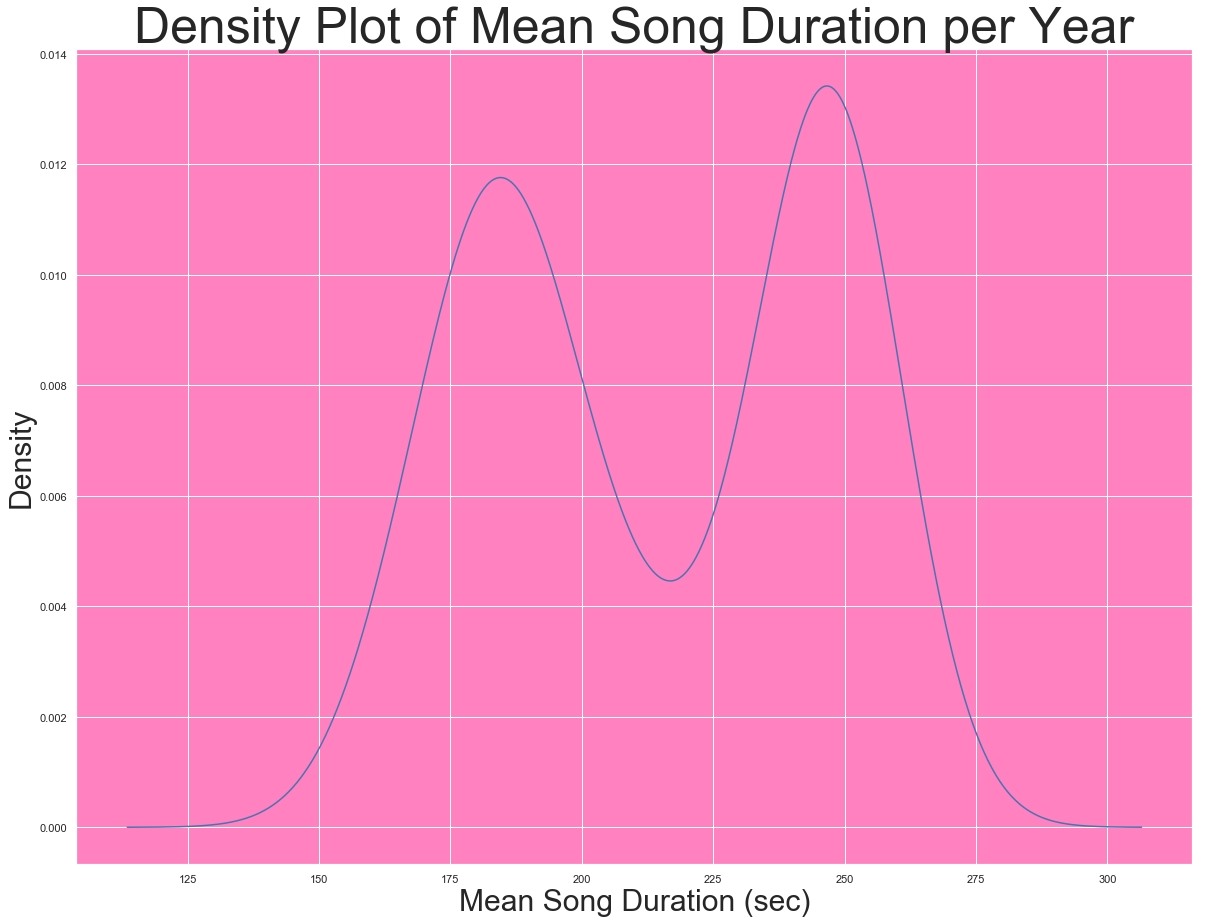

In [181]:
dfmean = df.groupby('year').duration.mean().plot.kde()
dfmean.set_facecolor('xkcd:pink')
plt.xlabel("Mean Song Duration (sec)", fontsize=30)
plt.ylabel("Density", fontsize=30)
plt.title('Density Plot of Mean Song Duration per Year',fontsize= 50)

# Seaborn Density Plot Binned w/Histogram

> **I believe this is showing me the density of songs in the dataset per year. The height of the histogram represents the density in the dataset, and the y-axis has been binned by year.**


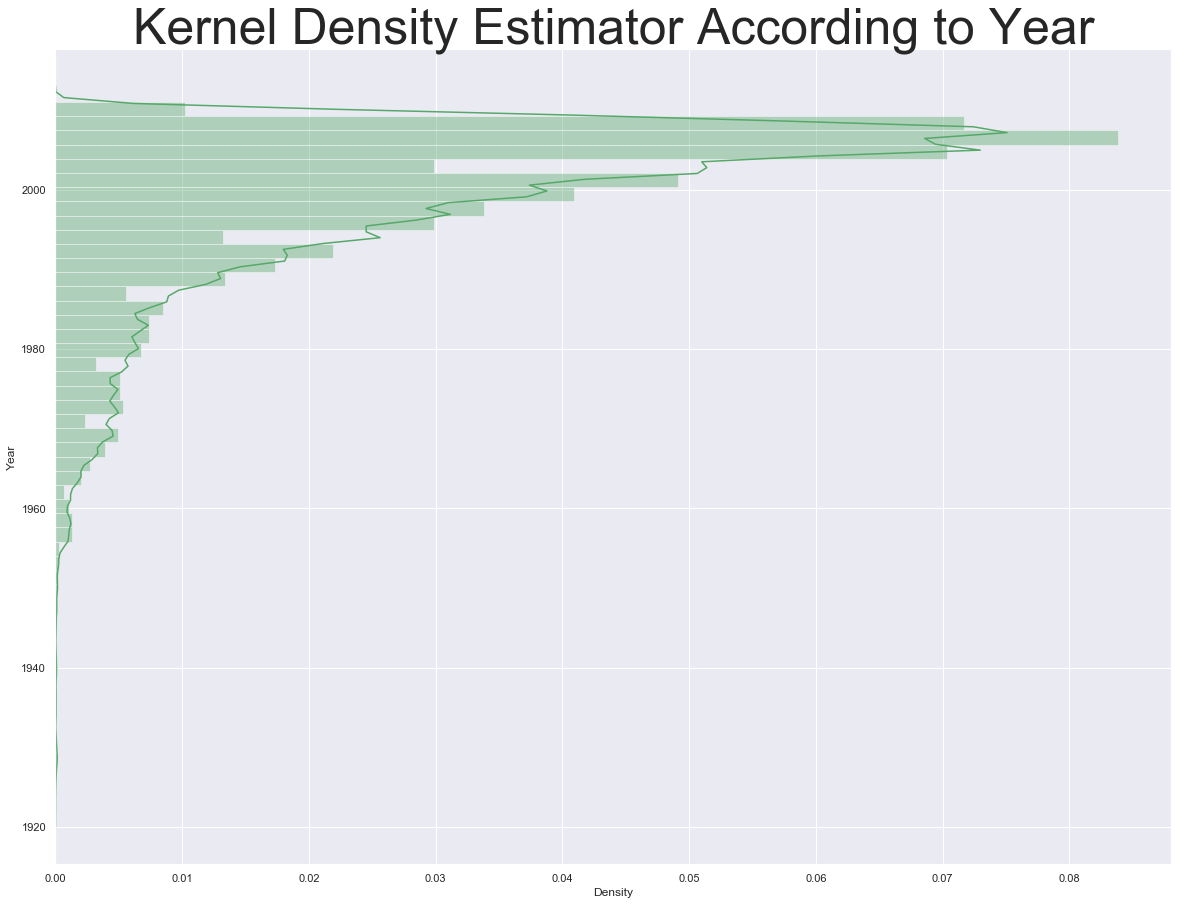

In [66]:
sns.distplot(df.year, vertical=True, color="g")
plt.xlabel("Density")
plt.ylabel("Year")
plt.title("Kernel Density Estimator According to Year", size = 50) 
plt.show()

# Sort mean song duration in descending order from dfmeand

In [134]:
dfmeand.sort_values(by='duration', ascending=False)

,duration
year,
1975,258.274897
1976,255.108482
2001,254.421158
1997,252.237227
1998,252.059119
2000,251.415730
1999,251.082857
1977,250.999259
1973,250.979679


# Seaborn scatterplot of 89 data points from mean song duration data frame

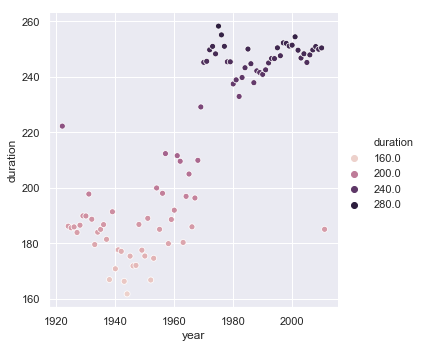

In [232]:
sns.relplot(x="year", y="duration", hue="duration", data=dfmeand)

# Seaborn line plot of dfmeand
> We see here that there is a linear relationship between ascending year and mean song duration

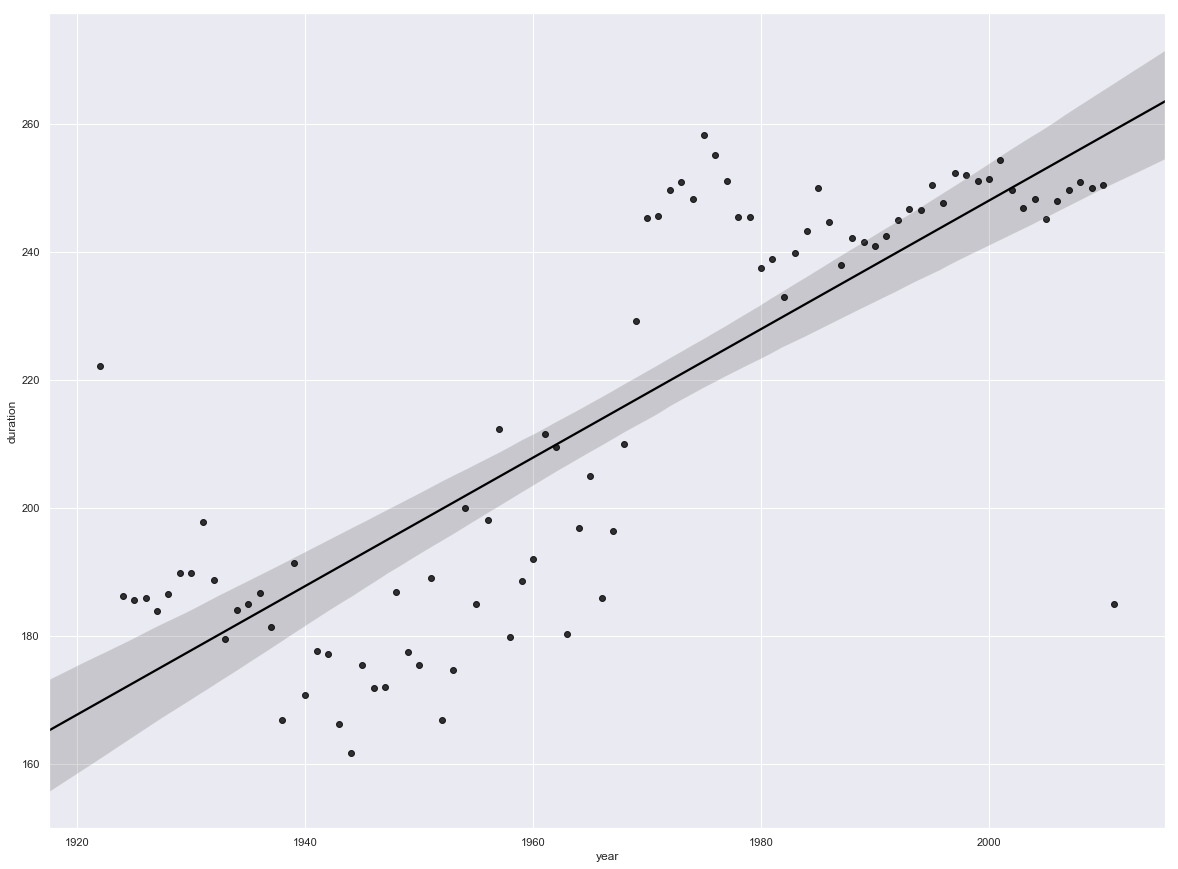

In [234]:
sns.regplot(x="year", y="duration", data=dfmeand, color="black")

# Applying local polynomial regression to highlight each curve
**Obviously there is a positive linear relationship here, but on visual inspection, we know there is more to the story...**

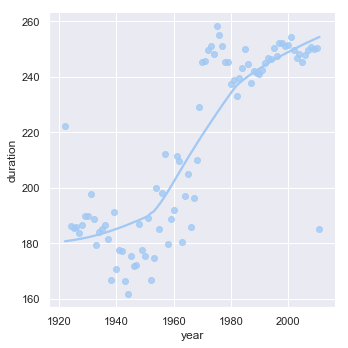

In [235]:
sns.set_palette("pastel")
sns.lmplot(x="year", y="duration", data=dfmeand,
    lowess=True)

# Jumping back to our full dataset, df
   > * The df dataset contains the year and duration of each song, cleaned of any zero values.
   > * The df dataset has the duration of 515576 songs.

In [145]:
df.info

<bound method DataFrame.info of           duration  year
1        252.05506  2003
2        156.55138  1995
3        138.97098  2006
4        145.05751  2003
8        221.20444  1993
11        68.96281  2007
12       168.22812  1997
14       318.45832  2005
16       262.26893  1998
17       216.47628  1994
18       196.02240  2009
19       217.57342  2007
23       213.47220  1996
24       319.81669  2001
27       253.70077  2004
28       210.93832  2002
34       372.42730  2001
35        92.73424  1996
36       155.19302  2007
38       437.70730  1998
40       246.54322  2003
42       276.19220  1977
44       181.81179  2008
45       175.20281  1994
46       228.44036  2007
48       282.93179  2005
53       137.50812  1993
54       349.98812  2001
55       201.14240  2003
58       224.46975  1992
...            ...   ...
999929   253.02159  1978
999930   163.36934  2006
999932   182.98730  2006
999936   167.83628  2006
999937   266.63138  2007
999938   333.00853  1996
999939   126.43220

# Seaborn line plot of full dataset, df

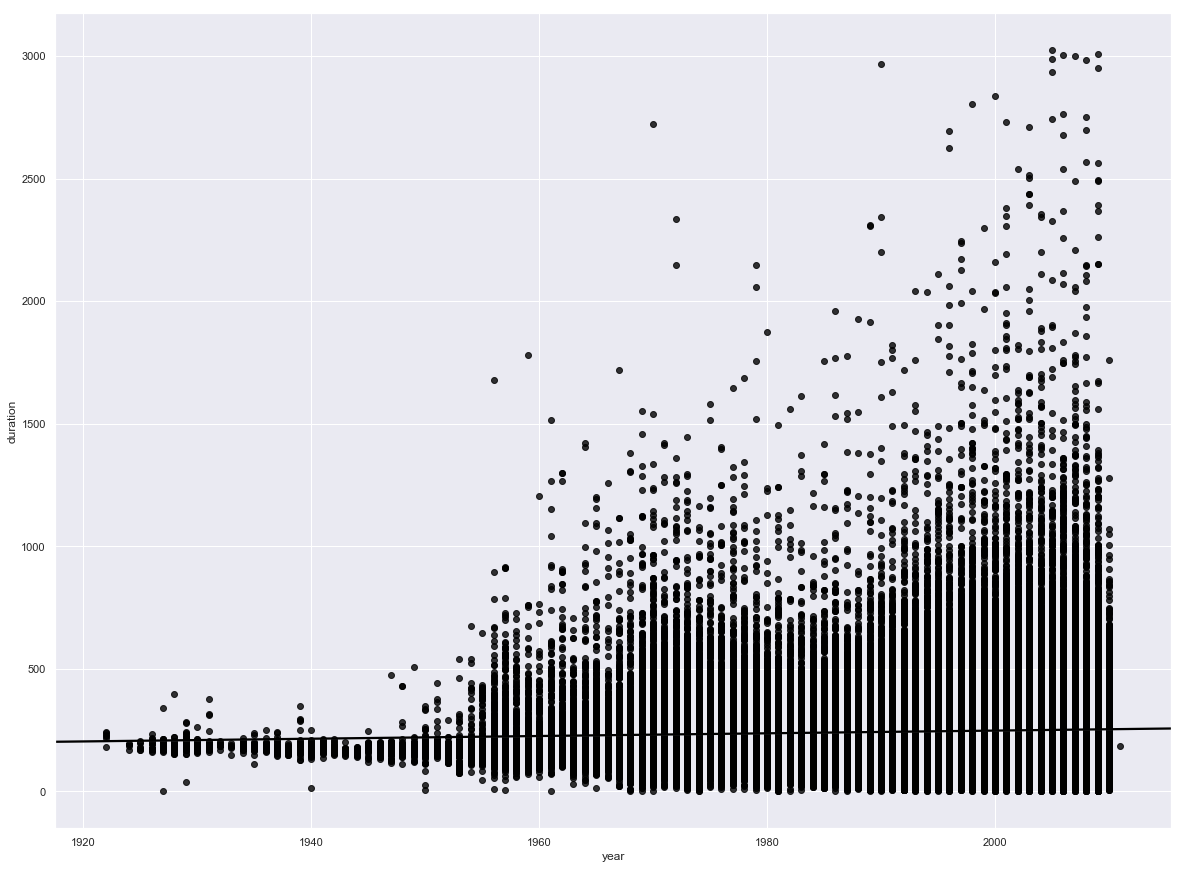

In [141]:
sns.regplot(x="year", y="duration", data=df, color="black")

# Seaborn scatterplot from full dataset df 

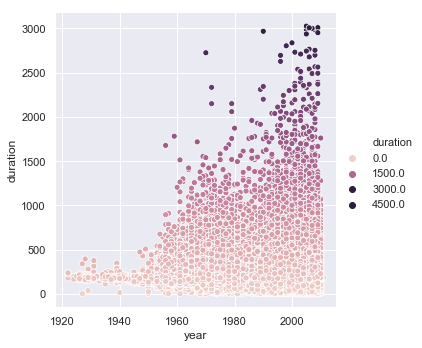

In [186]:
sns.relplot(x="year", y="duration", hue="duration", data=df)

In [101]:
over = df.loc[(df['duration'] >= 2500)]
over.sort_values(by='year', ascending=False)

,duration,year
459328,3007.73832,2009
643363,2561.98485,2009
538411,2950.47791,2009
20251,2696.85506,2008
960537,2752.05179,2008
241897,2565.85098,2008
413611,2983.39220,2008
729759,2999.50975,2007
649920,2677.13261,2006
963220,3005.59628,2006


# The 20 years with the longest mean song duration. Are these correlated to the top 20 artists in any way? (Aka, did the trendsetters set the mean duration of a song, or did the mean duration of a song set itself by another factor?)

In [259]:
dfmeand.sort_values(by='duration', ascending=False).iloc[:20]

,year,duration
52,1975,258.274897
53,1976,255.108482
78,2001,254.421158
74,1997,252.237227
75,1998,252.059119
77,2000,251.415730
76,1999,251.082857
54,1977,250.999259
50,1973,250.979679
85,2008,250.912838


# Trying a box plot

In [243]:
dfmeand.value_counts()

top_colors = dfmeand.duration.value_counts()
top_colors[:10].plot(kind='barh')
plt.xlabel('No. of Products');

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [242]:
ax = sns.boxenplot(x="year", y="duration", data=dfmeand, order=dfmeand.value_counts().iloc[:20].index)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [26]:
sorted = df.sort(['duration'], ascending = False)

AttributeError: 'DataFrame' object has no attribute 'sort'

# playing with new df smaller size

In [ ]:
dfsmall = df.loc[2:100]
dfsmall

In [ ]:
df.groupby('year').plot(x='year', y='duration')

In [ ]:
dfsmall['duration'].groupby(dfsmall['year']).describe()

# Can I view the albums ('release') from the top 20 artists?

# slicing

In [ ]:
df.loc[4370:4374]

# random filtering out just year 2000

In [ ]:
durationxyear_2000 = durationxyear[durationxyear['Year']==2000]
durationxyear_2000.shape

# Loading Metadata CSV File into Pandas, Labelling Columns and Showing Head

In [4]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv')
df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
0,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
1,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
2,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
3,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
4,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,NaN,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


# Merge Two Dataframes

In [ ]:
merged = pd.merge(tagdf, df, on='EchoNestArtistID')
merged

In [ ]:
merged[['Tag', 'year']]

# Create DataFrame that consists of Album and Artist

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from decimal import Decimal
%matplotlib inline
plt.show()

In [5]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv')
df.index += 1
df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
1,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
2,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
3,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
4,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
5,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,NaN,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


# Create DataFrame that consists of Album and Artist

In [6]:
df = df[['release', 'artist_name']]
df.head()

,release,artist_name
1,Monster Ballads X-Mas,Faster Pussy cat
2,Karkuteillä,Karkkiautomaatti
3,Butter,Hudson Mohawke
4,De Culo,Yerba Brava
5,Rene Ablaze Presents Winter Sessions,Der Mystic


# are any of the release values = 0 or NaN?

In [33]:
df = df[(df[['release']] != 0).all(axis=1)]
df

,release,artist_name
1,Monster Ballads X-Mas,Faster Pussy cat
2,Karkuteillä,Karkkiautomaatti
3,Butter,Hudson Mohawke
4,De Culo,Yerba Brava
5,Rene Ablaze Presents Winter Sessions,Der Mystic
6,Berwald: Symphonies Nos. 1/2/3/4,David Montgomery
7,Strictly The Best Vol. 34,Sasha / Turbulence
8,Da Bomb,Kris Kross
9,Danny Boy,Joseph Locke
10,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings


# are any of the artist_name values = 0 or NaN?

In [34]:
df = df[(df[['release']] != 0).all(axis=1)]
df

,release,artist_name
1,Monster Ballads X-Mas,Faster Pussy cat
2,Karkuteillä,Karkkiautomaatti
3,Butter,Hudson Mohawke
4,De Culo,Yerba Brava
5,Rene Ablaze Presents Winter Sessions,Der Mystic
6,Berwald: Symphonies Nos. 1/2/3/4,David Montgomery
7,Strictly The Best Vol. 34,Sasha / Turbulence
8,Da Bomb,Kris Kross
9,Danny Boy,Joseph Locke
10,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings


# get a list of only the top 20 value count artists with their associated release column values 

In [261]:
df.groupby(['artist_name', 'release']).size().unstack(fill_value=0)

AttributeError: 'Index' object has no attribute 'remove_unused_levels'

In [262]:
df['artist_name'].value_counts()

KeyError: 'artist_name'

In [263]:
top20 = df['artist_name'].value_counts()[0:21]
top20

KeyError: 'artist_name'

In [264]:
top20.groupby('artist_name')['release'].apply(list)

NameError: name 'top20' is not defined

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from decimal import Decimal
%matplotlib inline
plt.show()

In [287]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv')
df.index += 1
df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
1,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
2,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
3,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
4,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
5,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,NaN,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


In [290]:
df.columns

Index(['track_id', 'title', 'song_id', 'release', 'artist_id', 'artist_mbid',
       'artist_name', 'duration', 'artist_familiarity', 'artist_hotttnesss',
       'year', 'track_7digitalid', 'shs_perf', 'shs_work'],
      dtype='object')

# Create DataFrame that consists of duration, year & artist

In [291]:
df = df[['duration', 'year', 'artist_name']]
df.head()

,duration,year,artist_name
1,252.05506,2003,Faster Pussy cat
2,156.55138,1995,Karkkiautomaatti
3,138.97098,2006,Hudson Mohawke
4,145.05751,2003,Yerba Brava
5,514.29832,0,Der Mystic


# Remove all values that equal 0 in the year column

In [292]:
df = df[(df[['year']] != 0).all(axis=1)]
df

,duration,year,artist_name
1,252.05506,2003,Faster Pussy cat
2,156.55138,1995,Karkkiautomaatti
3,138.97098,2006,Hudson Mohawke
4,145.05751,2003,Yerba Brava
8,221.20444,1993,Kris Kross
11,68.96281,2007,3 Gars Su'l Sofa
12,168.22812,1997,Jorge Negrete
14,318.45832,2005,Tiger Lou
16,262.26893,1998,Lena Philipsson
17,216.47628,1994,Shawn Colvin


# Explore what types of data are in this DataFrame...

In [293]:
df.dtypes

duration       float64
year             int64
artist_name     object
dtype: object

# <font color='red'> Is there a correlation between duration of the track and the year?</font>

# 2 methods for getting mean song duration for each year 

# 1 : Get mean song duration for each year and create  <font color='red'> dfmean </font> dataset


> * Group the DataFrame by the year column
> * Compute the mean across the duration column for each year group


In [295]:
# setting index_parameter to false prohibits the year header from being added as a value and removed from the header names. 
dfmean = df.groupby(['year', 'artist_name'], as_index=False).duration.mean()
dfmean.index += 1
dfmean

,year,artist_name,duration
1,1922,Alberta Hunter,180.401180
2,1922,Barrington Levy,230.603302
3,1924,Papa Charlie Jackson,166.713020
4,1924,Vernon Dalhart,191.033015
5,1925,Bessie Smith,205.818320
6,1925,Clarence Williams' Blue Five,192.774513
7,1925,Papa Charlie Jackson,171.650157
8,1926,"Bertha ""Chippie"" Hill",164.753835
9,1926,Bertha Chippie Hill,170.892610
10,1926,Bessie Smith,204.094240


In [298]:
dfmean.sort_values(by='duration', ascending=False).iloc[:20]

,year,artist_name,duration
71037,2005,Monolithe,3024.665670
96098,2009,Missill,3007.738320
80024,2006,Warlords of Pez,3005.596280
73513,2005,William Basinski,2986.970980
18265,1990,Lydia Lunch,2966.177510
71304,2005,Nurse With Wound,2935.588120
92832,2008,William Basinski,2867.721995
45090,2000,Holger Czukay,2836.009340
71398,2005,Orthrelm,2743.091790
3516,1970,Alvin Lucier,2723.970160


# Plot mean from dfmean dataframe

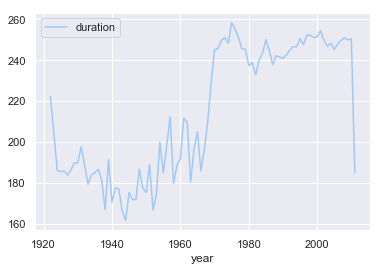

In [271]:
dfmean.plot('year')

# 2 : Get mean song duration for each year and create  <font color='red'> dfmeand </font> dataset

In [272]:
#again, we set the index_parameter to false to prevent the year heading from falling out
def convert_string_float(x):
    try:
        return float(x)
    except:
        return 0.0
    
df = df[['duration', 'year']].copy()
df = df.reindex(columns = ['duration', 'year'])
df['duration'] = df['duration'].apply(lambda x: convert_string_float(x))
dfmeand = df.groupby(['year'], as_index=False).mean()
dfmean.index += 1
dfmeand

,year,duration
0,1922,222.236282
1,1924,186.169016
2,1925,185.584619
3,1926,185.908892
4,1927,183.896728
5,1928,186.527395
6,1929,189.893178
7,1930,189.851628
8,1931,197.758427
9,1932,188.679621


# Plot mean from dfmeand dataframe

> * Our line plots from the dfmean and dfmeand dataframes are identical

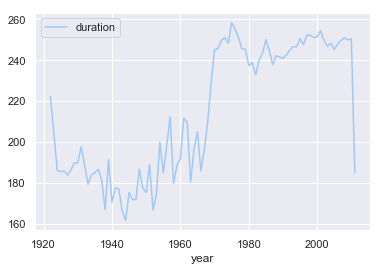

In [273]:
dfmeand.plot('year')

In [274]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from decimal import Decimal
%matplotlib inline
plt.show()

In [275]:
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('10_metadata.csv')
df.index += 1
df.head()

,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,track_7digitalid,shs_perf,shs_work
1,TRMMMYQ128F932D901,Silent Night,SOQMMHC12AB0180CB8,Monster Ballads X-Mas,ARYZTJS1187B98C555,357ff05d-848a-44cf-b608-cb34b5701ae5,Faster Pussy cat,252.05506,0.649822,0.394032,2003,7032331,-1,0
2,TRMMMKD128F425225D,Tanssi vaan,SOVFVAK12A8C1350D9,Karkuteillä,ARMVN3U1187FB3A1EB,8d7ef530-a6fd-4f8f-b2e2-74aec765e0f9,Karkkiautomaatti,156.55138,0.439604,0.356992,1995,1514808,-1,0
3,TRMMMRX128F93187D9,No One Could Ever,SOGTUKN12AB017F4F1,Butter,ARGEKB01187FB50750,3d403d44-36ce-465c-ad43-ae877e65adc4,Hudson Mohawke,138.97098,0.643681,0.437504,2006,6945353,-1,0
4,TRMMMCH128F425532C,Si Vos Querés,SOBNYVR12A8C13558C,De Culo,ARNWYLR1187B9B2F9C,12be7648-7094-495f-90e6-df4189d68615,Yerba Brava,145.05751,0.448501,0.372349,2003,2168257,-1,0
5,TRMMMWA128F426B589,Tangle Of Aspens,SOHSBXH12A8C13B0DF,Rene Ablaze Presents Winter Sessions,AREQDTE1269FB37231,NaN,Der Mystic,514.29832,0.000000,0.000000,0,2264873,-1,0


# Create DataFrame that consists of only duration and year

In [276]:
df = df[['duration', 'year']]
df.head()

,duration,year
1,252.05506,2003
2,156.55138,1995
3,138.97098,2006
4,145.05751,2003
5,514.29832,0


# Remove all values that equal 0 in the year column

In [277]:
df = df[(df[['year']] != 0).all(axis=1)]
df

,duration,year
1,252.05506,2003
2,156.55138,1995
3,138.97098,2006
4,145.05751,2003
8,221.20444,1993
11,68.96281,2007
12,168.22812,1997
14,318.45832,2005
16,262.26893,1998
17,216.47628,1994


# Explore what types of data are in this DataFrame...

In [278]:
df.dtypes

duration    float64
year          int64
dtype: object

# <font color='red'> Is there a correlation between duration of the track and the year?</font>

# 2 methods for getting mean song duration for each year 

# 1 : Get mean song duration for each year and create  <font color='red'> dfmean </font> dataset


> * Group the DataFrame by the year column
> * Compute the mean across the duration column for each year group


In [279]:
# setting index_parameter to false prohibits the year header from being added as a value and removed from the header names. 
dfmean = df.groupby(['year'], as_index=False).duration.mean()
dfmean.index += 1
dfmean

,year,duration
1,1922,222.236282
2,1924,186.169016
3,1925,185.584619
4,1926,185.908892
5,1927,183.896728
6,1928,186.527395
7,1929,189.893178
8,1930,189.851628
9,1931,197.758427
10,1932,188.679621


# Plot mean from dfmean dataframe

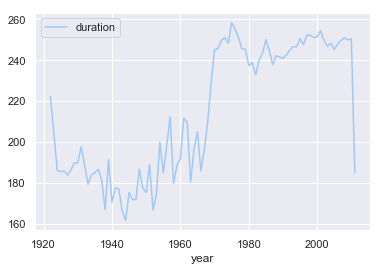

In [280]:
dfmean.plot('year')

# 2 : Get mean song duration for each year and create  <font color='red'> dfmeand </font> dataset

In [281]:
#again, we set the index_parameter to false to prevent the year heading from falling out
def convert_string_float(x):
    try:
        return float(x)
    except:
        return 0.0
    
df = df[['duration', 'year']].copy()
df = df.reindex(columns = ['duration', 'year'])
df['duration'] = df['duration'].apply(lambda x: convert_string_float(x))
dfmeand = df.groupby(['year'], as_index=False).mean()
dfmean.index += 1
dfmeand

,year,duration
0,1922,222.236282
1,1924,186.169016
2,1925,185.584619
3,1926,185.908892
4,1927,183.896728
5,1928,186.527395
6,1929,189.893178
7,1930,189.851628
8,1931,197.758427
9,1932,188.679621


# Plot mean from dfmeand dataframe

> * Our line plots from the dfmean and dfmeand dataframes are identical

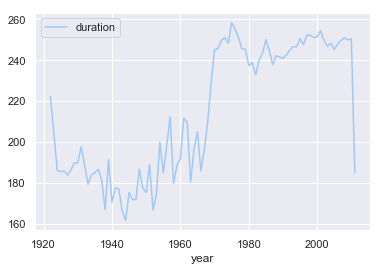

In [282]:
dfmeand.plot('year')